In [1]:
import talib
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [2]:
import TALib_Functions

In [3]:
# 当列太多时不换行
pd.set_option('expand_frame_repr', False)
# 最多显示行数
pd.set_option('display.max_rows', 8)

In [4]:
# 第一次尝试用def定义函数的方式
stock_code = 'SZ000000'
stadate = '20000101'
enddate = '20170801'
stock_data = TALib_Functions.import_stock_data(stock_code,stadate,enddate)
stock_data

,date,open,high,low,close,volume
0,2000-1-4,1368.69,1407.51,1361.21,1406.37,9044290
1,2000-1-5,1407.82,1433.78,1398.32,1409.68,10597824
2,2000-1-6,1406.03,1463.95,1400.25,1463.94,13519870
3,2000-1-7,1477.15,1522.82,1477.15,1516.60,34600184
...,...,...,...,...,...,...
4252,2017-7-27,3243.76,3251.93,3220.64,3249.78,228485952
4253,2017-7-28,3240.17,3256.37,3232.96,3253.24,182226880
4254,2017-7-31,3252.75,3276.95,3251.19,3273.03,246039440
4255,2017-8-1,3274.37,3292.64,3273.50,3292.64,237194592


In [5]:
Pattern_Recognition = pd.read_csv('datacsv/PatternRecognition.csv')
pattern_name = ['%s'%i for i in Pattern_Recognition['PatternRecognition']]
TALib_data = pd.DataFrame()
k = len(pattern_name)
Pattern_Recognition

,PatternRecognition
0,CDL2CROWS
1,CDL3BLACKCROWS
2,CDL3INSIDE
3,CDL3LINESTRIKE
...,...
57,CDLTRISTAR
58,CDLUNIQUE3RIVER
59,CDLUPSIDEGAP2CROWS
60,CDLXSIDEGAP3METHODS


In [6]:
open_p = stock_data['open'].values
high_p = stock_data['high'].values
low_p = stock_data['low'].values
close_p = stock_data['close'].values

In [7]:
for i in range(0,k) :
    TALib_data[pattern_name[i]] = getattr(talib,pattern_name[i])(open_p, high_p, low_p, close_p)

In [8]:
TALib_data = pd.concat([stock_data['date'], TALib_data], axis=1)
TALib_data = TALib_data.set_index('date')
TALib_data['PR'] = TALib_data.apply(lambda x: x.sum(), axis=1)
TALib_data = TALib_data.loc[TALib_data['PR'] <> 0, pattern_name]
TALib_data['Pattern'] = TALib_data.apply(lambda x: x.sum(), axis=1)
TALib_data.index = pd.to_datetime(TALib_data.index)

In [9]:
TALib_data[['Pattern']]

,Pattern
date,
2000-01-11,-100
2000-01-12,-100
2000-01-18,-200
2000-01-19,200
...,...
2017-07-26,500
2017-07-28,100
2017-07-31,200
2017-08-01,400


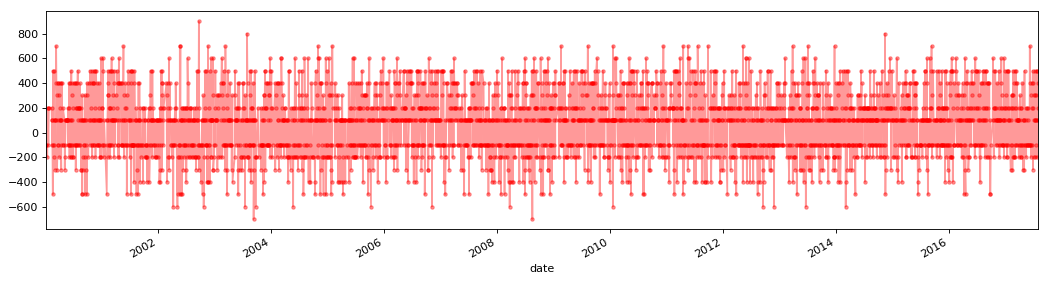

In [10]:
TALib_Functions.plot_signal(TALib_data['Pattern'])